In [1]:
import os,sys
from pmtool.ToolBox import ToolBox
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [ ]:
parameters = {'data_path': r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Duke-Breast-Cancer-MRI', # path to your DICOM data
              'data_type': 'dcm', # original data format: DICOM
              'multi_rts_per_pat': False}   # when False, it will look only for 1 rtstruct in the patient folder, 
                                            # this will speed up the process, 
                                            # if you have more then 1 rtstruct per patient, set it to True
data_dcms = ToolBox(**parameters)

 12%|█▏        | 115/923 [1:37:33<14:16:28, 63.60s/it]

In [ ]:
dataset_description = data_dcms.get_dataset_description() 
dataset_description.head(10)

In [29]:
print('Unique modalities found: ', np.unique(dataset_description.Modality.values)[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [4]:
MRI_dcms = ToolBox(**parameters)
dataset_description = MRI_dcms.get_dataset_description('MRI') 
dataset_description.head(10)

100%|██████████| 10/10 [00:10<00:00,  1.03s/it]
Patients processed: 0it [00:00, ?it/s]


,Manufacturer,SliceThickness,PixelSpacing,StudyDate,MagneticFieldStrength,EchoTime


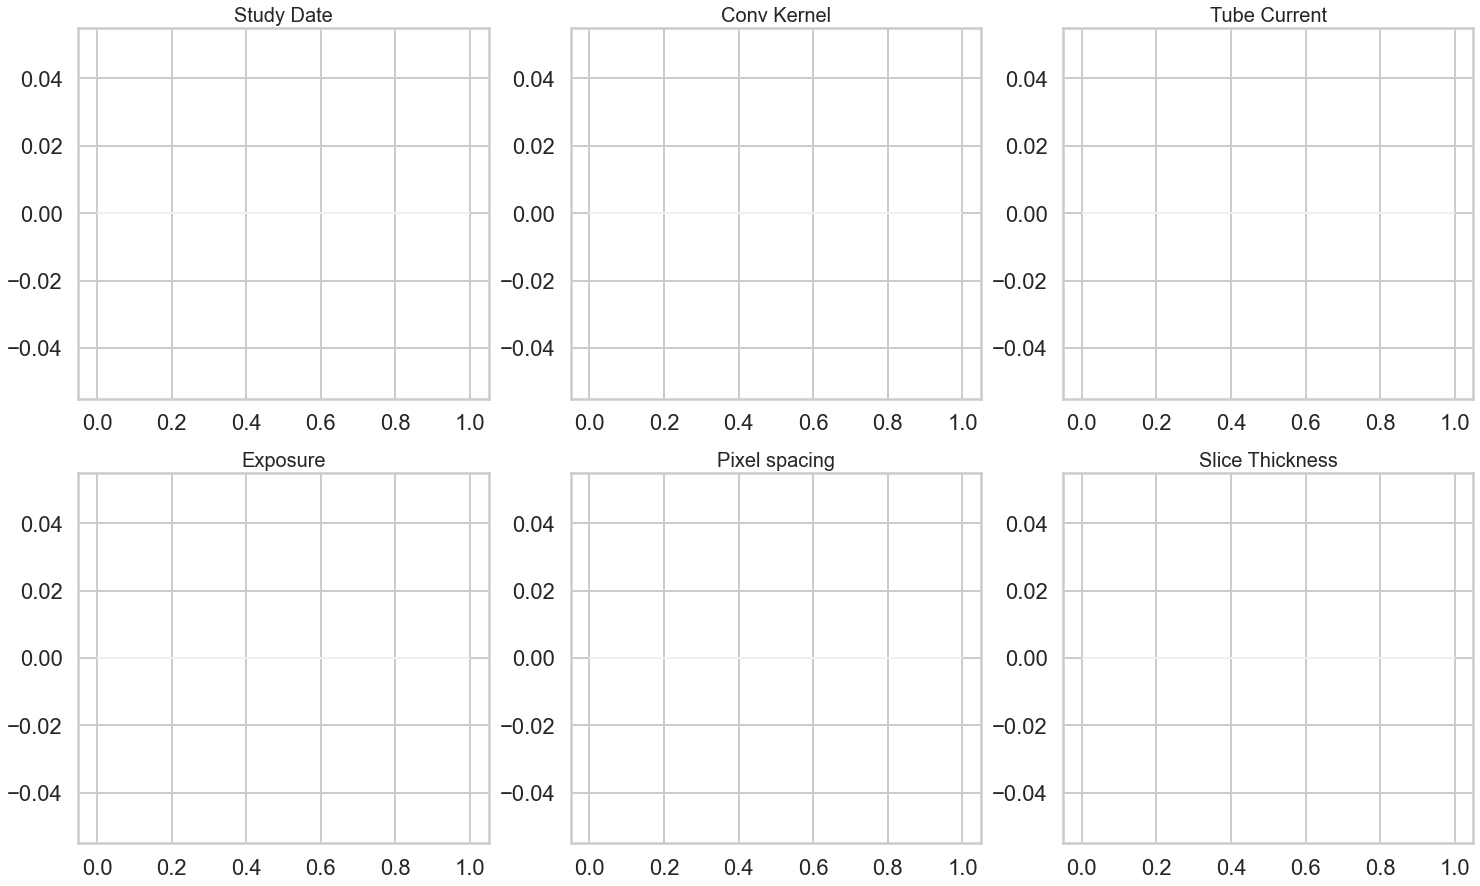

In [36]:
sb.set(context='poster', style='whitegrid')

study_date = sorted([ 'Nan' if x=='' or x=='NaN' else str(x[0:4]) for x in list(dataset_description['SeriesDate'])])[2:]
conv_kernel =['Nan' if x=='' or x=='NaN' else x for x in list(dataset_description['ConvolutionKernel'])]
tube_current =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['XRayTubeCurrent'])]
exposure =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['Exposure'])]
ps = sorted([(x[0]) for x in list(filter(lambda x: x != 'NaN', dataset_description['PixelSpacing'].values))])
sl_th = sorted([str(x)[0:3] for x in list(filter(lambda x: x != 'NaN', dataset_description['SliceThickness'].values))])
figures,descriptions = [study_date,conv_kernel,tube_current,exposure,ps,sl_th],['Study Date','Conv Kernel','Tube Current','Exposure','Pixel spacing','Slice Thickness']

fig,ax = plt.subplots(2,3,figsize=(25,15))
for i in range(2):
    for j in range(3):
        ax[i,j].hist(figures.pop(0),alpha=0.7)
        ax[i,j].set_title(descriptions.pop(0),fontsize=20)

In [40]:
qc_params = {'specific_modality': 'MRI', # target modality: CT
            'thickness_range': [1,2], # slice thickness should be in range of 2..5 mm (changed to 1-2 for this set)
            'spacing_range': [0.5,1.25], # pixel spacing should be in range of 0.5..1.25 mm
            'scan_length_range': [5,170], # scan should contain from 5 to 170 slices
            'axial_res': [512,512], # the axial resolution should be 512x512
            'kernels_list': ['standard','lung','b19f']} # the following kernels are acceptable

In [41]:
qc_dataframe = MRI_dcms.get_quality_checks(qc_params)

0it [00:00, ?it/s]


In [39]:
qc_dataframe

,Patient id,Modality is acceptable,Projection is axial,Complete scan (no missing/overlapping slices),Scan len is in range,Slice thickness is in range,Slice thickness is consistent,Pixel spacing is in range,Convolutional kernel tag is present,Convolutional kernel is acceptable,Axial pr. resolution is acceptable,Intensity intercept/slope tags are present


In [9]:
export_path = r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted'
region_of_interest = 'all'
data_ct = ToolBox(**parameters) 


  0%|          | 0/423 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\DataSet.py:98: UserWarning: No dcm data found for patient:LICENSE check the folder, ensure that dicom files ends with .dcm
  warn('No dcm data found for patient:%s check the folder, ensure that dicom files ends with .dcm'%patient)
100%|██████████| 423/423 [02:59<00:00,  2.35it/s]


In [10]:
data_ct.convert_to_nrrd(export_path, 'gtv')

Patients converted: 100%|██████████| 422/422 [12:24<00:00,  1.76s/it]


In [4]:
data_ct_nrrd = ToolBox(data_path = r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted\Test', data_type='nrrd')


0it [00:00, ?it/s]


In [ ]:
data_ct_nrrd.get_jpegs(r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted') # the function will create 'images_quick_check' folder in the specified directory 

Patients processed:  78%|███████▊  | 84/108 [12:07<03:18,  8.27s/it]

In [8]:
from ipywidgets import interact
import numpy as np
from PIL import Image

def browse_images(images,names):
    n = len(images)
    def view_image(i):
        plt.figure(figsize=(20,10))
        plt.imshow(images[i])#, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Slice: %s' % names[i])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

for pat,_ in data_ct_nrrd:
    _,file_struct = [*os.walk(os.path.join(r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted\images_quick_check',pat))]
    root,images = file_struct[0],file_struct[2]
    imgs =[np.array(Image.open(os.path.join(root,img))) for img in images]
    print(pat)
    browse_images(imgs,images)
    break

In [9]:
parameters = r"C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\examples\example_ct_parameters.yaml"
features = data_ct_nrrd.extract_features(parameters, loggenabled=True)

Patients processed: 100%|██████████| 108/108 [15:43<00:00,  8.74s/it]


In [ ]:
sb.set(context='poster', style='white')
data_ct_nrrd.pre_process(ref_img_path = r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted\converted_nrrds\LUNG1-001_1-1\image.nrrd',
                         save_path = r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted\Preprocessed',
                         hist_match = False,        # boolean
                         subcateneus_fat = False,   # boolean
                         fat_value = 774,           # this is a dummy value, 
                                                    # you would need to find that value for each image
                         percentile_scaling = False, # boolean
                         window_filtering_params = (1500,-600), #Window Filtering [WW,WL]
                         binning = 255,             # this is a dummy value, it takes False or int 
                                                    # (# of bins for intensity resampling)
                         verbosity = True,          # boolean
                         z_score = True,           # boolean 
                         hist_equalize = True,     # boolean
                         norm_coeff = (1000.,500.), # these are dummy values, you would need to estimate real mu and sigma
                                                    # it takes None or tuple: (mu,sigma)
                         visualize = True)

In [10]:
features.head(3)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,wavelet-LLL_gldm_HighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceEmphasis,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,Patient,ROI
0,v3.0.1,1.20.3,2.1.1,0.5.2,3.9.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",5f90e953b2aa8f8f6e176fafcbb71cebe5b23b8b,3D,"(0.9765625, 0.9765625, 3.0)",...,7972.117519631735,6.865691849444896,78554.59355537503,0.00170745805022931,0.0007290082487178971,0.5898053619535815,3885.3566040885776,0.0005789905550563673,LUNG1-359_1-1_GTV-1_mask,GTV-1_mask
1,v3.0.1,1.20.3,2.1.1,0.5.2,3.9.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",5f90e953b2aa8f8f6e176fafcbb71cebe5b23b8b,3D,"(0.9765625, 0.9765625, 3.0)",...,5109.5782982045275,66.24371584699453,352545.7369242779,0.012657111463957118,0.0003619177253578865,0.11499122818923925,493.8556447958576,0.00019054406027629807,LUNG1-359_1-1_gtv-2_mask,gtv-2_mask
2,v3.0.1,1.20.3,2.1.1,0.5.2,3.9.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [1.0, 2.0, 3...",2ed2ac82d49f08098b50be4b2aa450bf7103a406,3D,"(0.9765625, 0.9765625, 3.0)",...,9521.069766324608,29.46173949805911,405324.2241535032,0.0028717097222723123,0.00023360750566343386,0.3811692961359455,2650.701401680598,0.00011806215510406878,LUNG1-360_1-1_GTV-1_mask,GTV-1_mask


In [12]:
writer = pd.ExcelWriter(r'C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\data/features/extracted_features.xlsx') 
features.to_excel(writer, 'Sheet1')
writer.save()